# Data Analysis Of Mentemia App

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing file
data = pd.read_csv("Mentemia1/UserID by Accessed Date.csv")
data

,cc,orgid,m,w,d,user_id
0,Country 1,default,2020:m5,2020:w21,2020:05:23,b19962e1-6f70-4be3-9XXXXX
1,Country 1,default,2020:m5,2020:w21,2020:05:23,533c5915-2699-4517-aXXXXX
2,Country 1,default,2020:m5,2020:w21,2020:05:23,1625e4e6-0b0f-45b1-9XXXXX
3,Country 1,default,2020:m5,2020:w21,2020:05:23,b19962e1-6f70-4be3-9XXXXX
4,Country 2,default,2020:m5,2020:w21,2020:05:23,96d8595b-f93b-48f8-9XXXXX
...,...,...,...,...,...,...
747285,Country 2,default,2020:m5,2020:w20,2020:05:13,360e4450-2489-40f7-aXXXXX
747286,Country 2,default,2020:m5,2020:w20,2020:05:13,0c5397ae-00d8-4f91-bXXXXX
747287,Country 2,default,2020:m5,2020:w20,2020:05:13,2ef42a0c-5dd8-4896-9XXXXX
747288,Country 1,default,2020:m6,2020:w24,2020:06:12,af52590f-1929-4ffd-9XXXXX


In [3]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747290 entries, 0 to 747289
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   cc       747290 non-null  object
 1   orgid    747290 non-null  object
 2   m        747290 non-null  object
 3   w        747290 non-null  object
 4   d        747290 non-null  object
 5   user_id  747290 non-null  object
dtypes: object(6)
memory usage: 34.2+ MB


In [4]:
# data description
data.describe()

,cc,orgid,m,w,d,user_id
count,747290,747290,747290,747290,747290,747290
unique,3,1,3,10,66,32432
top,Country 1,default,2020:m6,2020:w22,2020:05:25,54674801-35f1-46af-8XXXXX
freq,398738,747290,359666,149611,26200,880


In [5]:
# To see is there a null value
data.isna().sum()

cc         0
orgid      0
m          0
w          0
d          0
user_id    0
dtype: int64

## Let's see description of the data

In [6]:
# To see size of the data and first 5 rows
print(data.shape)
d = data.head()
d

(747290, 6)


,cc,orgid,m,w,d,user_id
0,Country 1,default,2020:m5,2020:w21,2020:05:23,b19962e1-6f70-4be3-9XXXXX
1,Country 1,default,2020:m5,2020:w21,2020:05:23,533c5915-2699-4517-aXXXXX
2,Country 1,default,2020:m5,2020:w21,2020:05:23,1625e4e6-0b0f-45b1-9XXXXX
3,Country 1,default,2020:m5,2020:w21,2020:05:23,b19962e1-6f70-4be3-9XXXXX
4,Country 2,default,2020:m5,2020:w21,2020:05:23,96d8595b-f93b-48f8-9XXXXX


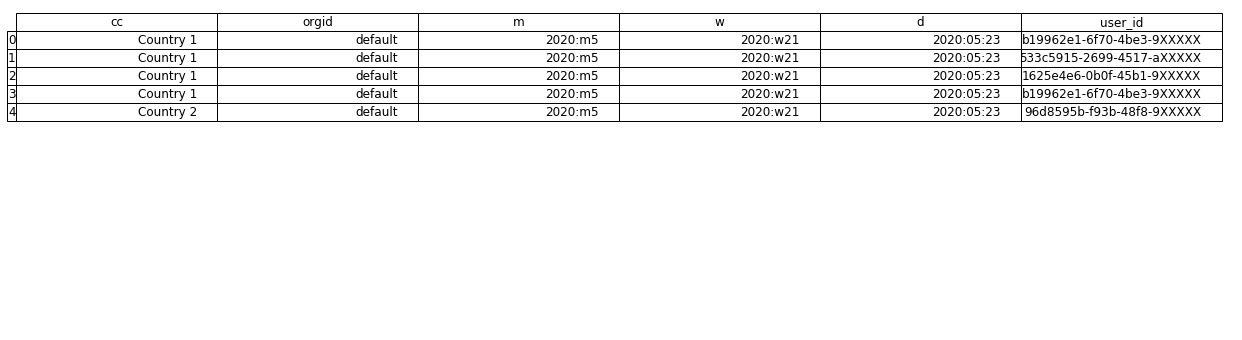

In [7]:
#from pandas.table.plotting import table # EDIT: see deprecation warnings below
from pandas.plotting import table 

fig, ax = plt.subplots(figsize=(12, 6)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, d, loc='upper right', colWidths=[0.2]*len(d.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.5, 1.5) # change size table


plt.savefig('Mentemia1/mytable.png')

# Task 1 and 2

 * To find month and week of active users.
 * Active users is the one who access the app atleast trice per week.
 * To find active users: Group data into number of users, months and weeks and count number of days they acces the app.
 * Filter the rows for days greater than and equal to 3
 

In [9]:
# Grouping data into user_id, month and week and count number of rows of days 
c = data.groupby(['user_id', 'm', 'w']).d.size()
c

user_id                    m        w       
0003bc4b-50eb-4efb-8XXXXX  2020:m6  2020:w24    4
0003e931-370c-46f0-8XXXXX  2020:m5  2020:w18    7
                                    2020:w19    1
                                    2020:w20    2
                                    2020:w21    2
                                               ..
fffacab9-c820-4164-8XXXXX  2020:m5  2020:w21    1
                           2020:m7  2020:w27    2
ffff2172-fff4-43ae-9XXXXX  2020:m5  2020:w18    7
                                    2020:w19    6
                           2020:m6  2020:w25    3
Name: d, Length: 89089, dtype: int64

In [10]:
# Converting c into dataframe
c1 = c.reset_index()
c1

,user_id,m,w,d
0,0003bc4b-50eb-4efb-8XXXXX,2020:m6,2020:w24,4
1,0003e931-370c-46f0-8XXXXX,2020:m5,2020:w18,7
2,0003e931-370c-46f0-8XXXXX,2020:m5,2020:w19,1
3,0003e931-370c-46f0-8XXXXX,2020:m5,2020:w20,2
4,0003e931-370c-46f0-8XXXXX,2020:m5,2020:w21,2
...,...,...,...,...
89084,fffacab9-c820-4164-8XXXXX,2020:m5,2020:w21,1
89085,fffacab9-c820-4164-8XXXXX,2020:m7,2020:w27,2
89086,ffff2172-fff4-43ae-9XXXXX,2020:m5,2020:w18,7
89087,ffff2172-fff4-43ae-9XXXXX,2020:m5,2020:w19,6


### Filtering for days greater than equal to 3 and sorting days in decending order

In [16]:
# Filtering for days greater than equal to 3 and sorting days in decending order
c2 = c1[c1['d'] >= 3].sort_values('d', ascending=False)
c2

,user_id,m,w,d
87416,fb0c1da1-fb48-450c-9XXXXX,2020:m5,2020:w22,306
32543,5c693a2f-acde-4099-aXXXXX,2020:m6,2020:w23,260
17105,30a9c81b-b435-4ff9-9XXXXX,2020:m6,2020:w24,222
29769,54674801-35f1-46af-8XXXXX,2020:m5,2020:w22,219
4650,0d816f9d-818f-4f11-8XXXXX,2020:m6,2020:w23,218
...,...,...,...,...
36152,67012afb-4e87-4647-8XXXXX,2020:m5,2020:w18,3
36140,66fb2465-e762-431b-aXXXXX,2020:m6,2020:w23,3
75090,d72d16ab-4ad7-439b-bXXXXX,2020:m5,2020:w21,3
36130,66ee7a7f-ea2a-4847-9XXXXX,2020:m6,2020:w23,3


### Use crosstab to see weekly access by each month

In [17]:
# Use crosstab to see weekly access by each month
c4 = pd.crosstab(c2.m, c2.w)
c4

w,2020:w18,2020:w19,2020:w20,2020:w21,2020:w22,2020:w23,2020:w24,2020:w25,2020:w26,2020:w27
m,,,,,,,,,,
2020:m5,3432,4562,5279,7703,9745,0,0,0,0,0
2020:m6,0,0,0,0,0,8182,7759,6169,5197,2356
2020:m7,0,0,0,0,0,0,0,0,0,4553


### Plot to see weekly access of active users each month

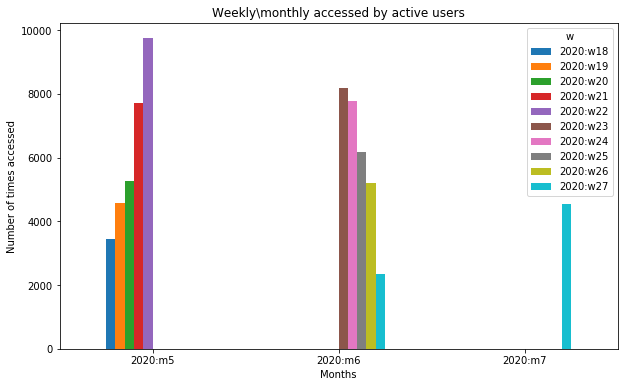

In [20]:
# Plot of weekly access of each month of active users
c4.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly\monthly accessed by active users')
plt.xlabel('Months')
plt.ylabel('Number of times accessed')
plt.xticks(rotation=0);

plt.savefig('Mentemia1/task1.jpg')

# Task 8

To find proportion of country wise users.

In [36]:
data.describe()

,cc,orgid,m,w,d,user_id
count,747290,747290,747290,747290,747290,747290
unique,3,1,3,10,66,32432
top,Country 1,default,2020:m6,2020:w22,2020:05:25,54674801-35f1-46af-8XXXXX
freq,398738,747290,359666,149611,26200,880


### Group data into users and countries and count for number of days accessed the app

In [18]:
v = data.groupby(['user_id', 'cc']).d.count()
v

user_id                    cc       
0003bc4b-50eb-4efb-8XXXXX  Country 2     4
0003e931-370c-46f0-8XXXXX  Country 1    12
00065d56-cb5d-41e3-8XXXXX  Country 1     4
000916f7-db2a-49d3-aXXXXX  Country 1     4
000cf46a-7d5f-437f-bXXXXX  Country 1     3
                                        ..
fff4875e-4e38-46c0-bXXXXX  Country 1     6
fff57b87-1ed7-432e-bXXXXX  Country 1     1
fff730ae-6899-4856-bXXXXX  Country 2    34
fffacab9-c820-4164-8XXXXX  Country 2     3
ffff2172-fff4-43ae-9XXXXX  Country 1    16
Name: d, Length: 32583, dtype: int64

### Converting v into a dataframe 

In [19]:
v1 = v.reset_index()
v1



,user_id,cc,d
0,0003bc4b-50eb-4efb-8XXXXX,Country 2,4
1,0003e931-370c-46f0-8XXXXX,Country 1,12
2,00065d56-cb5d-41e3-8XXXXX,Country 1,4
3,000916f7-db2a-49d3-aXXXXX,Country 1,4
4,000cf46a-7d5f-437f-bXXXXX,Country 1,3
...,...,...,...
32578,fff4875e-4e38-46c0-bXXXXX,Country 1,6
32579,fff57b87-1ed7-432e-bXXXXX,Country 1,1
32580,fff730ae-6899-4856-bXXXXX,Country 2,34
32581,fffacab9-c820-4164-8XXXXX,Country 2,3


### Totaling number of users country wise

In [20]:
v2 = v1.cc.value_counts()
v2

Country 1    22322
Country 2     9972
Country 3      289
Name: cc, dtype: int64

In [21]:
v2[0]/v1.shape[0] * 100

68.50811773010466

### Converting v2 into a dataframe

In [22]:
v3 = v2.reset_index()
v3


,index,cc
0,Country 1,22322
1,Country 2,9972
2,Country 3,289


### Adding one column in v3 that will count proportion of users from each country 

In [24]:
v3['prop']= (v3['cc']/v3['cc'].sum() * 100).round(2)
v3

,index,cc,prop
0,Country 1,22322,68.51
1,Country 2,9972,30.60
2,Country 3,289,0.89


### Plot to see proportion of users from each country

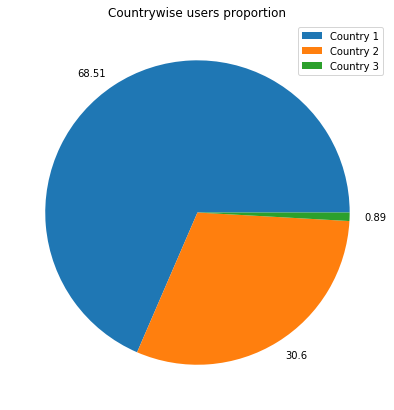

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(v3['prop'], labels=v3['prop'])
ax.set(title='Countrywise users proportion')
plt.legend(v3['index']);

plt.savefig('Mentemia1/task8.png')

# Extra cell for example

In [77]:
group_user = data.groupby(['user_id', 'w'])
group_size = group_user.size()
group_size

user_id                    w       
0003bc4b-50eb-4efb-8XXXXX  2020:w24    4
0003e931-370c-46f0-8XXXXX  2020:w18    7
                           2020:w19    1
                           2020:w20    2
                           2020:w21    2
                                      ..
fffacab9-c820-4164-8XXXXX  2020:w21    1
                           2020:w27    2
ffff2172-fff4-43ae-9XXXXX  2020:w18    7
                           2020:w19    6
                           2020:w25    3
Length: 85794, dtype: int64

## Unstack coverts second index into rows and stack coverts rows into index

In [79]:
# Unstack means converting second column in group_size into rows
group_size.unstack()

w,2020:w18,2020:w19,2020:w20,2020:w21,2020:w22,2020:w23,2020:w24,2020:w25,2020:w26,2020:w27
user_id,,,,,,,,,,
0003bc4b-50eb-4efb-8XXXXX,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN
0003e931-370c-46f0-8XXXXX,7.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
00065d56-cb5d-41e3-8XXXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
000916f7-db2a-49d3-aXXXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
000cf46a-7d5f-437f-bXXXXX,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
fff4875e-4e38-46c0-bXXXXX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN
fff57b87-1ed7-432e-bXXXXX,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fff730ae-6899-4856-bXXXXX,NaN,NaN,NaN,NaN,NaN,NaN,18.0,16.0,NaN,NaN


In [43]:
group_w3 = group_size.apply(lambda x: x >= 3)
group_w3

user_id                    w       
0003bc4b-50eb-4efb-8XXXXX  2020:w24     True
0003e931-370c-46f0-8XXXXX  2020:w18     True
                           2020:w19    False
                           2020:w20    False
                           2020:w21    False
                                       ...  
fffacab9-c820-4164-8XXXXX  2020:w21    False
                           2020:w27    False
ffff2172-fff4-43ae-9XXXXX  2020:w18     True
                           2020:w19     True
                           2020:w25     True
Length: 85794, dtype: bool

In [45]:
group_w3.value_counts()

True     63646
False    22148
dtype: int64

In [38]:
data.groupby(['user_id', 'm']).size()

user_id                    m      
0003bc4b-50eb-4efb-8XXXXX  2020:m6     4
0003e931-370c-46f0-8XXXXX  2020:m5    12
00065d56-cb5d-41e3-8XXXXX  2020:m7     4
000916f7-db2a-49d3-aXXXXX  2020:m7     4
000cf46a-7d5f-437f-bXXXXX  2020:m6     3
                                      ..
fff730ae-6899-4856-bXXXXX  2020:m6    34
fffacab9-c820-4164-8XXXXX  2020:m5     1
                           2020:m7     2
ffff2172-fff4-43ae-9XXXXX  2020:m5    13
                           2020:m6     3
Length: 48362, dtype: int64

In [34]:
#df.groupby(["Rep"]).sum().sort_values("Units", ascending=False)
data.groupby(['user_id', 'w']).size()['w'=='2020:w23']

4

In [41]:
data.pivot_table(index='user_id', columns='w', aggfunc='count')

cc                                      \
w                         2020:w18 2020:w19 2020:w20 2020:w21 2020:w22   
user_id                                                                  
0003bc4b-50eb-4efb-8XXXXX      NaN      NaN      NaN      NaN      NaN   
0003e931-370c-46f0-8XXXXX      7.0      1.0      2.0      2.0      NaN   
00065d56-cb5d-41e3-8XXXXX      NaN      NaN      NaN      NaN      NaN   
000916f7-db2a-49d3-aXXXXX      NaN      NaN      NaN      NaN      NaN   
000cf46a-7d5f-437f-bXXXXX      NaN      NaN      NaN      NaN      NaN   
...                            ...      ...      ...      ...      ...   
fff4875e-4e38-46c0-bXXXXX      NaN      NaN      NaN      NaN      NaN   
fff57b87-1ed7-432e-bXXXXX      1.0      NaN      NaN      NaN      NaN   
fff730ae-6899-4856-bXXXXX      NaN      NaN      NaN      NaN      NaN   
fffacab9-c820-4164-8XXXXX      NaN      NaN      NaN      1.0      NaN   
ffff2172-fff4-43ae-9XXXXX      7.0      6.0      NaN      NaN      NaN   

                                                                        ...  \
w                         2020:w23 2020:w24 2020:w25 2020:w26 2020:w27  ...   
user_id                                                                 ...   
0003bc4b-50eb-4efb-8XXXXX      NaN      4.0      NaN      NaN      NaN  ...   
0003e931-370c-46f0-8XXXXX      NaN      NaN      NaN      NaN      NaN  ...   
00065d56-cb5d-41e3-8XXXXX      NaN      NaN      NaN      NaN      4.0  ...   
000916f7-db2a-49d3-aXXXXX      NaN      NaN      NaN      NaN      4.0  ...   
000cf46a-7d5f-437f-bXXXXX      3.0      NaN      NaN      NaN      NaN  ...   
...                            ...      ...      ...      ...      ...  ...   
fff4875e-4e38-46c0-bXXXXX      NaN      NaN      2.0      4.0      NaN  ...   
fff57b87-1ed7-432e-bXXXXX      NaN      NaN      NaN      NaN      NaN  ...   
fff730ae-6899-4856-bXXXXX      NaN     18.0     16.0      NaN      NaN  ...   
fffacab9-c820-4164-8XXXXX      NaN      NaN      NaN      NaN      2.0  ...   
ffff2172-fff4-43ae-9XXXXX      NaN      NaN      3.0      NaN      NaN  ...   

                             orgid                                      \
w                         2020:w18 2020:w19 2020:w20 2020:w21 2020:w22   
user_id                                                                  
0003bc4b-50eb-4efb-8XXXXX      NaN      NaN      NaN      NaN      NaN   
0003e931-370c-46f0-8XXXXX      7.0      1.0      2.0      2.0      NaN   
00065d56-cb5d-41e3-8XXXXX      NaN      NaN      NaN      NaN      NaN   
000916f7-db2a-49d3-aXXXXX      NaN      NaN      NaN      NaN      NaN   
000cf46a-7d5f-437f-bXXXXX      NaN      NaN      NaN      NaN      NaN   
...                            ...      ...      ...      ...      ...   
fff4875e-4e38-46c0-bXXXXX      NaN      NaN      NaN      NaN      NaN   
fff57b87-1ed7-432e-bXXXXX      1.0      NaN      NaN      NaN      NaN   
fff730ae-6899-4856-bXXXXX      NaN      NaN      NaN      NaN      NaN   
fffacab9-c820-4164-8XXXXX      NaN      NaN      NaN      1.0      NaN   
ffff2172-fff4-43ae-9XXXXX      7.0      6.0      NaN      NaN      NaN   

                                                                        
w                         2020:w23 2020:w24 2020:w25 2020:w26 2020:w27  
user_id                                                                 
0003bc4b-50eb-4efb-8XXXXX      NaN      4.0      NaN      NaN      NaN  
0003e931-370c-46f0-8XXXXX      NaN      NaN      NaN      NaN      NaN  
00065d56-cb5d-41e3-8XXXXX      NaN      NaN      NaN      NaN      4.0  
000916f7-db2a-49d3-aXXXXX      NaN      NaN      NaN      NaN      4.0  
000cf46a-7d5f-437f-bXXXXX      3.0      NaN      NaN      NaN      NaN  
...                            ...      ...      ...      ...      ...  
fff4875e-4e38-46c0-bXXXXX      NaN      NaN      2.0      4.0      NaN  
fff57b87-1ed7-432e-bXXXXX      NaN      NaN      NaN      NaN      NaN  
fff730ae-6899-4856-bXXXXX      NaN     18.0     

# Task 3

How often people are completing suggestions.

In [3]:
# Inserting data
data1 = pd.read_csv('Mentemia1/Completed Suggestions.csv')
data1

,user_id,orgid,m,w,d,origin,contenttype,title
0,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:09,Today,Tool,Personality quiz
1,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Breathe to relax
2,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Keep a thought journal for sleep
3,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,App-Introduction,Video,Watch Me First
4,0004f561-1320-47c1-bXXXXX,default,2020:m7,2020:w27,2020:07:01,Tools,Tool,Guided breathing
...,...,...,...,...,...,...,...,...
29995,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w28,2020:07:09,Today,Tool,Mood Tracker
29996,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:25,Today,Content,On the frontlines: Ruben Mackellar â€“ Lifelin...
29997,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:26,Today,Content,Personal story: Getting real about how I feel
29998,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w27,2020:07:05,Today,Content,Personal story: I wonder if there are others l...


In [6]:
data1.describe()

,user_id,orgid,m,w,d,origin,contenttype,title
count,30000,30000,30000,30000,30000,30000,30000,29999
unique,1524,1,3,10,61,14,3,262
top,009f0ddf-1aa5-478e-9XXXXX,default,2020:m7,2020:w27,2020:07:02,Today,Content,Mood Tracker
freq,282,30000,16121,3949,678,28123,22461,3485


### Grouping data into title, months and weeks.

In [46]:
z1 = data1.groupby(['title', 'm', 'w']).size()
z1

title                                    m        w       
10 gratitude prompts to boost your mood  2020:m6  2020:w23    7
                                                  2020:w24    5
                                                  2020:w25    5
                                                  2020:w26    6
                                                  2020:w27    3
                                                             ..
Your financial dictionary                2020:m7  2020:w27    3
                                                  2020:w28    3
                                                  2020:w29    1
                                                  2020:w30    4
                                                  2020:w31    2
Length: 2221, dtype: int64

In [47]:
z2 = z1.reset_index()
z2

,title,m,w,0
0,10 gratitude prompts to boost your mood,2020:m6,2020:w23,7
1,10 gratitude prompts to boost your mood,2020:m6,2020:w24,5
2,10 gratitude prompts to boost your mood,2020:m6,2020:w25,5
3,10 gratitude prompts to boost your mood,2020:m6,2020:w26,6
4,10 gratitude prompts to boost your mood,2020:m6,2020:w27,3
...,...,...,...,...
2216,Your financial dictionary,2020:m7,2020:w27,3
2217,Your financial dictionary,2020:m7,2020:w28,3
2218,Your financial dictionary,2020:m7,2020:w29,1
2219,Your financial dictionary,2020:m7,2020:w30,4


### Making pivot table of month and week.

In [49]:
z4 = pd.crosstab(z2.m, z2.w)
z4

w,2020:w22,2020:w23,2020:w24,2020:w25,2020:w26,2020:w27,2020:w28,2020:w29,2020:w30,2020:w31
m,,,,,,,,,,
2020:m5,1,0,0,0,0,0,0,0,0,0
2020:m6,0,208,216,222,229,200,0,0,0,0
2020:m7,0,0,0,0,0,225,230,233,232,225


### Plot to see number of suggestions per month and per week.

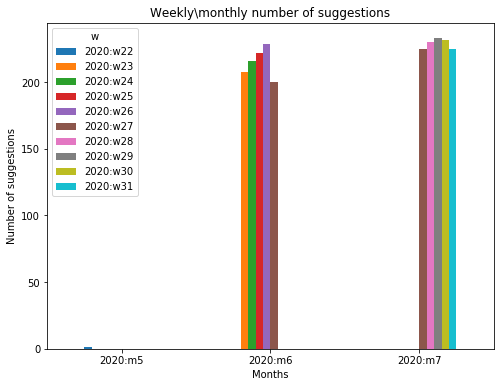

In [66]:
z4.plot(kind='bar', figsize=(8, 6))
plt.title('Weekly\monthly number of suggestions')
plt.xlabel('Months')
plt.ylabel('Number of suggestions')
plt.xticks(rotation=0);

plt.savefig('Mentemia1/task4_1.png')


### Now, we see number of suggestions individually per month, per week and per day.

#### To see number of suggestions per month, group data into title and month.

In [87]:
a = data1.groupby(['title', 'm']).size()
a

title                                                    m      
10 gratitude prompts to boost your mood                  2020:m6    26
                                                         2020:m7    30
10 random acts of kindness                               2020:m6    46
                                                         2020:m7    58
10 ways sleep can improve your life                      2020:m6    17
                                                                    ..
Worth a watch: The School of Life                        2020:m7    32
Worth a watch: The Struggle Switch - By Dr. Russ Harris  2020:m6    41
                                                         2020:m7    30
Your financial dictionary                                2020:m6    16
                                                         2020:m7    13
Length: 494, dtype: int64

In [88]:
a1 = a.reset_index()
a1

,title,m,0
0,10 gratitude prompts to boost your mood,2020:m6,26
1,10 gratitude prompts to boost your mood,2020:m7,30
2,10 random acts of kindness,2020:m6,46
3,10 random acts of kindness,2020:m7,58
4,10 ways sleep can improve your life,2020:m6,17
...,...,...,...
489,Worth a watch: The School of Life,2020:m7,32
490,Worth a watch: The Struggle Switch - By Dr. Ru...,2020:m6,41
491,Worth a watch: The Struggle Switch - By Dr. Ru...,2020:m7,30
492,Your financial dictionary,2020:m6,16


#### Counting total number of suggestions per month.

In [96]:
a2 = a1.m.value_counts()
a2

2020:m7    252
2020:m6    241
2020:m5      1
Name: m, dtype: int64

#### Plot to see number of suggestions per month.

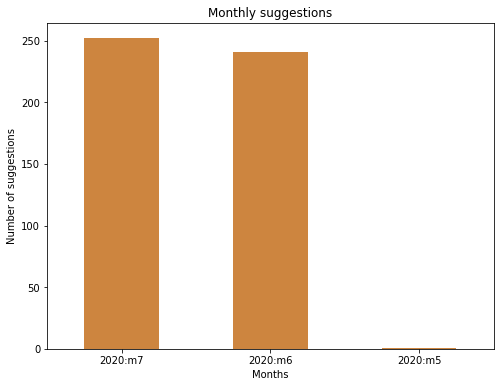

In [146]:
a2.plot(kind='bar', figsize=(8, 6), color='peru')
plt.title('Monthly suggestions')
plt.xlabel('Months')
plt.ylabel('Number of suggestions')
plt.xticks(rotation=0);

plt.savefig('Mentemia1/task3_m.png')

#### To see number of suggestions per week, group data into title and week.

In [139]:
q = data1.groupby(['title', 'w']).size()
q

title                                    w       
10 gratitude prompts to boost your mood  2020:w23    7
                                         2020:w24    5
                                         2020:w25    5
                                         2020:w26    6
                                         2020:w27    9
                                                    ..
Your financial dictionary                2020:w27    3
                                         2020:w28    3
                                         2020:w29    1
                                         2020:w30    4
                                         2020:w31    2
Length: 2025, dtype: int64

In [140]:
q1 = q.reset_index()
q1

,title,w,0
0,10 gratitude prompts to boost your mood,2020:w23,7
1,10 gratitude prompts to boost your mood,2020:w24,5
2,10 gratitude prompts to boost your mood,2020:w25,5
3,10 gratitude prompts to boost your mood,2020:w26,6
4,10 gratitude prompts to boost your mood,2020:w27,9
...,...,...,...
2020,Your financial dictionary,2020:w27,3
2021,Your financial dictionary,2020:w28,3
2022,Your financial dictionary,2020:w29,1
2023,Your financial dictionary,2020:w30,4


#### Counting total number of suggestions per week.

In [141]:
q2 = q1.w.value_counts()
q2

2020:w29    233
2020:w30    232
2020:w28    230
2020:w27    229
2020:w26    229
2020:w31    225
2020:w25    222
2020:w24    216
2020:w23    208
2020:w22      1
Name: w, dtype: int64

In [142]:
q3 = q2.reset_index()
q3

,index,w
0,2020:w29,233
1,2020:w30,232
2,2020:w28,230
3,2020:w27,229
4,2020:w26,229
5,2020:w31,225
6,2020:w25,222
7,2020:w24,216
8,2020:w23,208
9,2020:w22,1


#### Plot to see number of suggestions per week.

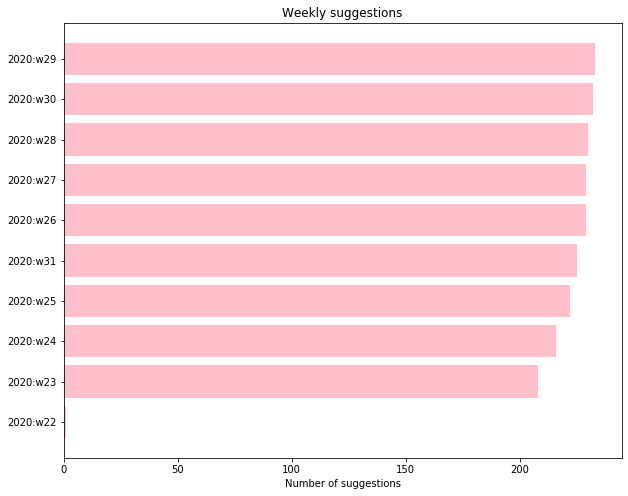

In [145]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(q3['index'], q3['w'], color='pink')
ax.set(title='Weekly suggestions', xlabel='Number of suggestions')
ax.invert_yaxis();

plt.savefig('Mentemia1/task3_w.png')

#### To see number of suggestions per day, gruop data into title and day

In [118]:
x2 = data1.groupby(['title', 'd']).size()
x2

title                                    d         
10 gratitude prompts to boost your mood  2020:06:03    3
                                         2020:06:05    2
                                         2020:06:06    2
                                         2020:06:08    1
                                         2020:06:09    1
                                                      ..
Your financial dictionary                2020:07:21    1
                                         2020:07:22    1
                                         2020:07:23    1
                                         2020:07:24    1
                                         2020:07:31    2
Length: 8889, dtype: int64

In [119]:
x3 = x2.reset_index()
x3

,title,d,0
0,10 gratitude prompts to boost your mood,2020:06:03,3
1,10 gratitude prompts to boost your mood,2020:06:05,2
2,10 gratitude prompts to boost your mood,2020:06:06,2
3,10 gratitude prompts to boost your mood,2020:06:08,1
4,10 gratitude prompts to boost your mood,2020:06:09,1
...,...,...,...
8884,Your financial dictionary,2020:07:21,1
8885,Your financial dictionary,2020:07:22,1
8886,Your financial dictionary,2020:07:23,1
8887,Your financial dictionary,2020:07:24,1


#### Count total number of suggestions per day.

In [122]:
x4 =x3.d.value_counts()
x4

2020:06:15    168
2020:06:23    168
2020:06:29    167
2020:07:03    167
2020:06:09    167
             ... 
2020:07:10    128
2020:06:03    127
2020:07:25    125
2020:06:02     28
2020:05:29      1
Name: d, Length: 61, dtype: int64

In [123]:
x5= x4.reset_index()
x5

,index,d
0,2020:06:15,168
1,2020:06:23,168
2,2020:06:29,167
3,2020:07:03,167
4,2020:06:09,167
...,...,...
56,2020:07:10,128
57,2020:06:03,127
58,2020:07:25,125
59,2020:06:02,28


#### Plot to see number of suggestions per day.

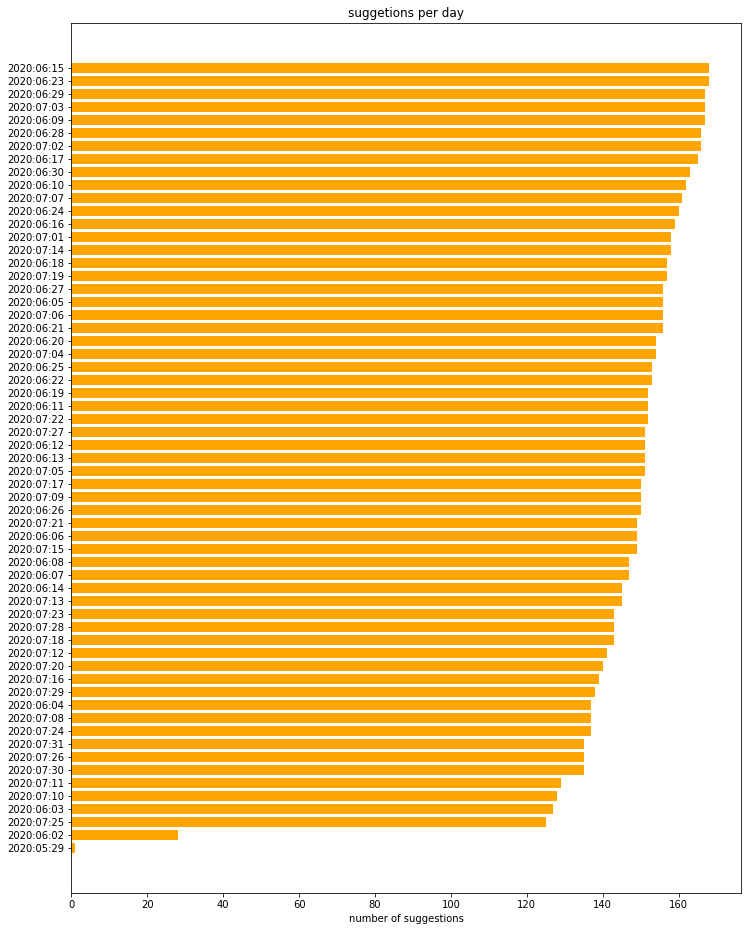

In [148]:
fig, ax = plt.subplots(figsize=(12, 16))
ax.barh(x5['index'], x5['d'], color='orange')
ax.set(title='suggetions per day', xlabel='number of suggestions')
ax.invert_yaxis();

plt.savefig('Mentemia1/task3_d')

# Task 4

Most and least popular suggestions.

In [30]:
data1

,user_id,orgid,m,w,d,origin,contenttype,title
0,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:09,Today,Tool,Personality quiz
1,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Breathe to relax
2,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Keep a thought journal for sleep
3,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,App-Introduction,Video,Watch Me First
4,0004f561-1320-47c1-bXXXXX,default,2020:m7,2020:w27,2020:07:01,Tools,Tool,Guided breathing
...,...,...,...,...,...,...,...,...
29995,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w28,2020:07:09,Today,Tool,Mood Tracker
29996,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:25,Today,Content,On the frontlines: Ruben Mackellar â€“ Lifelin...
29997,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:26,Today,Content,Personal story: Getting real about how I feel
29998,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w27,2020:07:05,Today,Content,Personal story: I wonder if there are others l...


### Totaling number of rows to each suggestions.

In [33]:
sugg = data1.title.value_counts()
sugg

Mood Tracker                                                                                 3485
Personality quiz                                                                             1009
Worry Map                                                                                     859
Guided breathing                                                                              754
Random Acts of Kindness                                                                       748
                                                                                             ... 
Sir John Kirwan: To our frontline workers                                                       1
How to take things less personally                                                              1
Normal emotions in an abnormal time                                                             1
Getting started with Mentemia                                                                   1
Worth a read: Siouxs

In [34]:
s1 = sugg.reset_index()
s1

,index,title
0,Mood Tracker,3485
1,Personality quiz,1009
2,Worry Map,859
3,Guided breathing,754
4,Random Acts of Kindness,748
...,...,...
257,Sir John Kirwan: To our frontline workers,1
258,How to take things less personally,1
259,Normal emotions in an abnormal time,1
260,Getting started with Mentemia,1


### Seeing top 10 most popular suggestions

In [35]:
s2 = s1.head(10)
s2

,index,title
0,Mood Tracker,3485
1,Personality quiz,1009
2,Worry Map,859
3,Guided breathing,754
4,Random Acts of Kindness,748
5,Watch Me First,683
6,Try this: Create a bedtime ritual,438
7,Try this: Keep a thought journal for sleep,422
8,Try this: Take a breather,397
9,Try this: Plan for laughter,393


### Seeing least 10 popular suggestions

In [49]:
s3 = s1.tail(10)
s3

,index,title
252,It's ok to change your mind,2
253,Bookmark this: How to get rid of COVID-19 from...,2
254,We're here for you,1
255,Bookmark this: Covid19.govt.nz,1
256,5 ways to relax your mind at bedtime for bette...,1
257,Sir John Kirwan: To our frontline workers,1
258,How to take things less personally,1
259,Normal emotions in an abnormal time,1
260,Getting started with Mentemia,1
261,Worth a read: Siouxsie Wiles and Toby Morris o...,1


### Plot for top 10 most popular suggestions

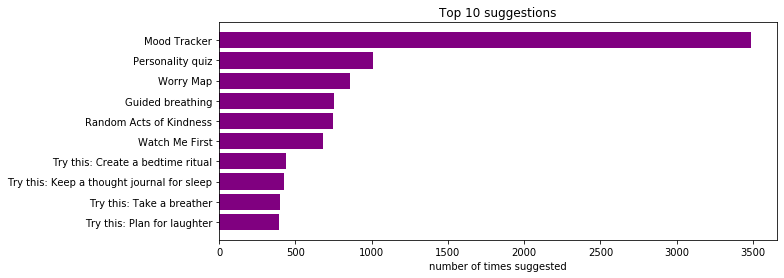

In [50]:
fig, ax =plt.subplots(figsize=(10, 4))
plt.barh(s2['index'], s2['title'], color='purple')
ax.set(title='Top 10 suggestions', xlabel='number of times suggested')
ax.invert_yaxis();

plt.savefig('Mentemia1/task4_t.png')


### Plot for least 10 popular suggestions

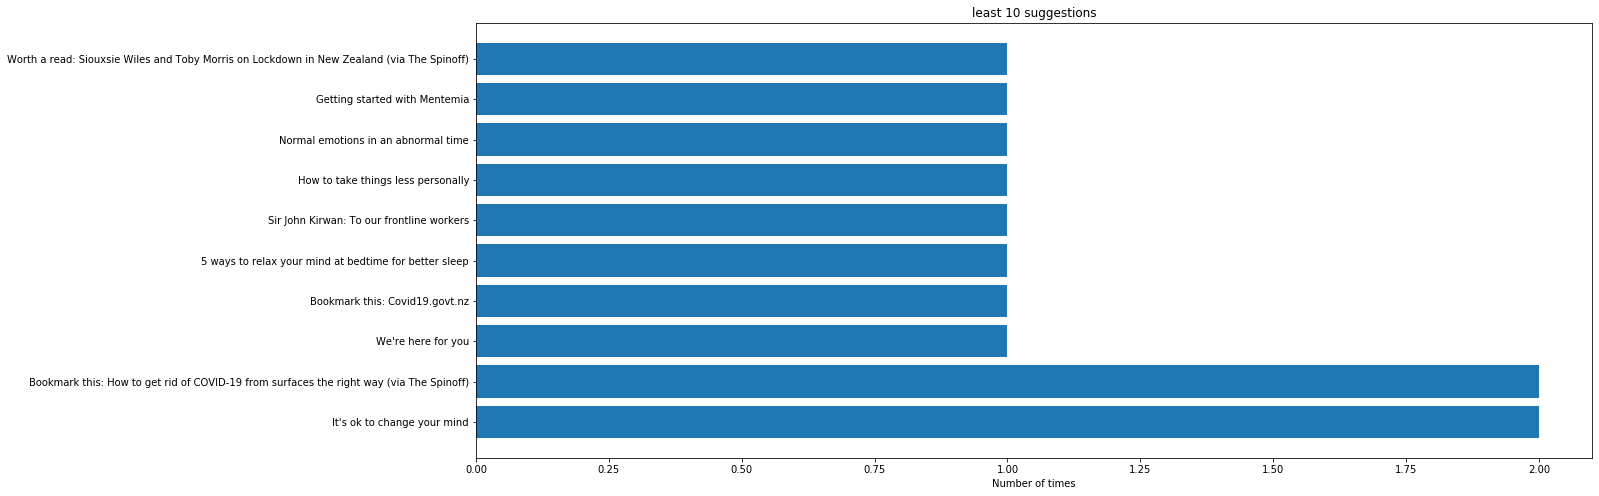

In [52]:
fig, ax = plt.subplots(figsize = (20, 8))
plt.barh(s3['index'], s3['title'])
ax.set(title='least 10 suggestions', xlabel='Number of times');

plt.savefig('Mentemia1/task4_l.png')


# Task 5

In [149]:
data1

,user_id,orgid,m,w,d,origin,contenttype,title
0,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:09,Today,Tool,Personality quiz
1,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Breathe to relax
2,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Keep a thought journal for sleep
3,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,App-Introduction,Video,Watch Me First
4,0004f561-1320-47c1-bXXXXX,default,2020:m7,2020:w27,2020:07:01,Tools,Tool,Guided breathing
...,...,...,...,...,...,...,...,...
29995,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w28,2020:07:09,Today,Tool,Mood Tracker
29996,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:25,Today,Content,On the frontlines: Ruben Mackellar â€“ Lifelin...
29997,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:26,Today,Content,Personal story: Getting real about how I feel
29998,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w27,2020:07:05,Today,Content,Personal story: I wonder if there are others l...


In [193]:
data1.describe()

,user_id,orgid,m,w,d,origin,contenttype,title
count,30000,30000,30000,30000,30000,30000,30000,29999
unique,1524,1,3,10,61,14,3,262
top,009f0ddf-1aa5-478e-9XXXXX,default,2020:m7,2020:w27,2020:07:02,Today,Content,Mood Tracker
freq,282,30000,16121,3949,678,28123,22461,3485


In [150]:
a =data1.groupby(['user_id','w' ,'title']).d.size()
a

user_id                    w         title                                                                                     
0003bc4b-50eb-4efb-8XXXXX  2020:w24  Personality quiz                                                                              1
                                     Try this: Breathe to relax                                                                    1
                                     Try this: Keep a thought journal for sleep                                                    1
                                     Watch Me First                                                                                1
0004f561-1320-47c1-bXXXXX  2020:w27  Guided breathing                                                                              1
                                                                                                                                  ..
14804e89-6212-4d9d-bXXXXX  2020:w30  Information about managed isolation a

In [151]:
a1 = a.reset_index()
a1

,user_id,w,title,d
0,0003bc4b-50eb-4efb-8XXXXX,2020:w24,Personality quiz,1
1,0003bc4b-50eb-4efb-8XXXXX,2020:w24,Try this: Breathe to relax,1
2,0003bc4b-50eb-4efb-8XXXXX,2020:w24,Try this: Keep a thought journal for sleep,1
3,0003bc4b-50eb-4efb-8XXXXX,2020:w24,Watch Me First,1
4,0004f561-1320-47c1-bXXXXX,2020:w27,Guided breathing,1
...,...,...,...,...
27116,14804e89-6212-4d9d-bXXXXX,2020:w30,Information about managed isolation and quaran...,1
27117,14804e89-6212-4d9d-bXXXXX,2020:w30,Mood Tracker,3
27118,14804e89-6212-4d9d-bXXXXX,2020:w30,"Personal story: Living with ""one nut and half ...",1
27119,14804e89-6212-4d9d-bXXXXX,2020:w31,Guided breathing,1


In [152]:
a2 = a1[a1['d'] >= 3]
a2

,user_id,w,title,d
63,0014946a-ce0c-45d0-aXXXXX,2020:w30,Mood Tracker,5
87,0014946a-ce0c-45d0-aXXXXX,2020:w31,Mood Tracker,4
114,001a99da-96b4-4725-9XXXXX,2020:w27,Mood Tracker,3
122,001a99da-96b4-4725-9XXXXX,2020:w28,Mood Tracker,7
129,001a99da-96b4-4725-9XXXXX,2020:w29,Mood Tracker,3
...,...,...,...,...
27007,1461fba0-829d-4214-aXXXXX,2020:w28,Mood Tracker,4
27037,14675f57-dcf9-43fb-9XXXXX,2020:w30,Mood Tracker,6
27107,14804e89-6212-4d9d-bXXXXX,2020:w28,Mood Tracker,6
27113,14804e89-6212-4d9d-bXXXXX,2020:w29,Mood Tracker,4


In [153]:
a3 = a2.sort_values('d', ascending=False)
a3

,user_id,w,title,d
19096,0e0f5317-d724-44aa-8XXXXX,2020:w30,Mood Tracker,7
19698,0e9b78cc-b0b4-4543-bXXXXX,2020:w28,Mood Tracker,7
13764,09d7945a-4617-4831-9XXXXX,2020:w28,Mood Tracker,7
1131,009f0ddf-1aa5-478e-9XXXXX,2020:w28,Mood Tracker,7
1154,009f0ddf-1aa5-478e-9XXXXX,2020:w29,Mood Tracker,7
...,...,...,...,...
2939,01af4279-6c68-4349-9XXXXX,2020:w30,Mood Tracker,3
2930,019c79f6-57c3-485b-aXXXXX,2020:w30,Mood Tracker,3
10433,0733a65c-b9c1-4d48-8XXXXX,2020:w29,Try this: Alternate nostril breathing,3
2925,01981450-bc5f-46f7-9XXXXX,2020:w31,Personality quiz,3


In [124]:
# Top 1%
1/100 * 558

5.58

In [154]:
a4 = a3.head(6)
a4

,user_id,w,title,d
19096,0e0f5317-d724-44aa-8XXXXX,2020:w30,Mood Tracker,7
19698,0e9b78cc-b0b4-4543-bXXXXX,2020:w28,Mood Tracker,7
13764,09d7945a-4617-4831-9XXXXX,2020:w28,Mood Tracker,7
1131,009f0ddf-1aa5-478e-9XXXXX,2020:w28,Mood Tracker,7
1154,009f0ddf-1aa5-478e-9XXXXX,2020:w29,Mood Tracker,7
10052,06e55091-eda0-498b-8XXXXX,2020:w29,Mood Tracker,7


In [127]:
a5 = a3.tail(6)
a5

,user_id,w,title,d
5733,03f4ad8d-cd2f-479a-aXXXXX,2020:w29,Mood Tracker,3
2939,01af4279-6c68-4349-9XXXXX,2020:w30,Mood Tracker,3
2930,019c79f6-57c3-485b-aXXXXX,2020:w30,Mood Tracker,3
10433,0733a65c-b9c1-4d48-8XXXXX,2020:w29,Try this: Alternate nostril breathing,3
2925,01981450-bc5f-46f7-9XXXXX,2020:w31,Personality quiz,3
27117,14804e89-6212-4d9d-bXXXXX,2020:w30,Mood Tracker,3


# Task 6

Most and least popular intents combinations

In [54]:
data4 = pd.read_csv('Mentemia1/Intents.csv')
data4

,user_id,orgid,m,w,d,name,SELECTED
0,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Focus,True
1,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Sleep,False
2,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Energy,False
3,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Mood,False
4,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Relationships,False
...,...,...,...,...,...,...,...
205213,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Sleep,True
205214,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Energy,True
205215,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Happiness,False
205216,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Relationships,True


In [120]:
data4.describe()

,user_id,orgid,m,w,d,name,SELECTED
count,205218,205218,205218,205218,205218,205218,205218
unique,13098,1,3,10,62,8,2
top,6c23539f-6cf3-46de-9XXXXX,default,2020:m7,2020:w27,2020:07:02,Stress,False
freq,150,205218,110010,44067,15603,31251,102666


In [118]:
data4.name.value_counts()

Stress           31251
Sleep            29070
Happiness        28842
Energy           28401
Mood             27792
Focus            24447
Relationships    22065
Help others      13350
Name: name, dtype: int64

### Grouping data into name and number of times selected and unselected

In [55]:
com = data4.groupby(['name', 'SELECTED']).size()
com

name           SELECTED
Energy         False       14347
               True        14054
Focus          False       12118
               True        12329
Happiness      False       14306
               True        14536
Help others    False        6744
               True         6606
Mood           False       13830
               True        13962
Relationships  False       11162
               True        10903
Sleep          False       14557
               True        14513
Stress         False       15602
               True        15649
dtype: int64

### Unstack works same as cross tab

In [56]:
com.unstack()

SELECTED,False,True
name,,
Energy,14347,14054
Focus,12118,12329
Happiness,14306,14536
Help others,6744,6606
Mood,13830,13962
Relationships,11162,10903
Sleep,14557,14513
Stress,15602,15649


### Finding total number of True or False for each inten.

In [60]:
com1 = pd.crosstab(data4.name, data4.SELECTED)
com1

SELECTED,False,True
name,,
Energy,14347,14054
Focus,12118,12329
Happiness,14306,14536
Help others,6744,6606
Mood,13830,13962
Relationships,11162,10903
Sleep,14557,14513
Stress,15602,15649


### Sorting the dataframe with name column in decending order.

In [61]:
com2 = com1.sort_values('name', ascending=False)
com2

SELECTED,False,True
name,,
Stress,15602,15649
Sleep,14557,14513
Relationships,11162,10903
Mood,13830,13962
Help others,6744,6606
Happiness,14306,14536
Focus,12118,12329
Energy,14347,14054


### plot to see intents with their true or false combination

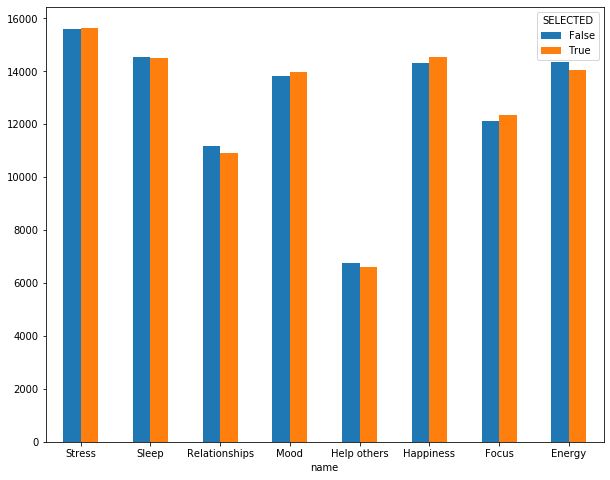

In [64]:
com2.plot(kind='bar', figsize=(10, 8))
ax.set(title='Intents')
plt.xticks(rotation=0);

plt.savefig('Mentemia1/task6.png')


# Task 7

The most and least combination of top 5% users

In [65]:
data4

,user_id,orgid,m,w,d,name,SELECTED
0,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Focus,True
1,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Sleep,False
2,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Energy,False
3,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Mood,False
4,afe07180-7814-43c7-aXXXXX,default,2020:m5,2020:w22,2020:05:29,Relationships,False
...,...,...,...,...,...,...,...
205213,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Sleep,True
205214,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Energy,True
205215,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Happiness,False
205216,f320152c-423c-40aa-bXXXXX,default,2020:m7,2020:w31,2020:07:31,Relationships,True


### Grouping data into users, name and selected with number of weeks

In [101]:
a = data4.groupby(['user_id', 'name', 'SELECTED']).w.size()
a

user_id                    name       SELECTED
0003bc4b-50eb-4efb-8XXXXX  Energy     False       2
                                      True        1
                           Focus      True        3
                           Mood       False       2
                                      True        1
                                                 ..
fffea4c8-1f96-4418-9XXXXX  Focus      True        2
                           Happiness  False       1
                                      True        2
                           Stress     False       2
                                      True        1
Name: w, Length: 112222, dtype: int64

In [102]:
a1 = a.reset_index()
a1

,user_id,name,SELECTED,w
0,0003bc4b-50eb-4efb-8XXXXX,Energy,False,2
1,0003bc4b-50eb-4efb-8XXXXX,Energy,True,1
2,0003bc4b-50eb-4efb-8XXXXX,Focus,True,3
3,0003bc4b-50eb-4efb-8XXXXX,Mood,False,2
4,0003bc4b-50eb-4efb-8XXXXX,Mood,True,1
...,...,...,...,...
112217,fffea4c8-1f96-4418-9XXXXX,Focus,True,2
112218,fffea4c8-1f96-4418-9XXXXX,Happiness,False,1
112219,fffea4c8-1f96-4418-9XXXXX,Happiness,True,2
112220,fffea4c8-1f96-4418-9XXXXX,Stress,False,2


### Filtering rows with week greater than and equal to 3

In [105]:
a2 = a1[a1['w'] >= 3]
a2

,user_id,name,SELECTED,w
2,0003bc4b-50eb-4efb-8XXXXX,Focus,True,3
7,0004f561-1320-47c1-bXXXXX,Happiness,False,3
8,0004f561-1320-47c1-bXXXXX,Happiness,True,3
11,0004f561-1320-47c1-bXXXXX,Sleep,True,3
12,0004f561-1320-47c1-bXXXXX,Stress,False,3
...,...,...,...,...
112197,fff4875e-4e38-46c0-bXXXXX,Energy,False,3
112198,fff4875e-4e38-46c0-bXXXXX,Mood,True,3
112199,fff4875e-4e38-46c0-bXXXXX,Relationships,False,3
112210,fff730ae-6899-4856-bXXXXX,Happiness,False,3


### Sorting week in decending order

In [106]:
a3 = a2.sort_values('w', ascending=False)
a3

,user_id,name,SELECTED,w
9759,16486770-a315-407b-9XXXXX,Sleep,True,28
9758,16486770-a315-407b-9XXXXX,Sleep,False,23
91188,cfa9236f-e977-48e9-9XXXXX,Focus,True,19
106698,f33093cf-2b6d-424e-9XXXXX,Happiness,True,18
91185,cfa9236f-e977-48e9-9XXXXX,Energy,False,18
...,...,...,...,...
40358,5c61e42d-db1c-4809-9XXXXX,Energy,True,3
40363,5c61e42d-db1c-4809-9XXXXX,Stress,True,3
40366,5c675311-73de-4ece-8XXXXX,Relationships,True,3
40371,5c691513-c53e-4078-8XXXXX,Energy,False,3


### Calculating top 5% users by 5/100 times total number of rows 19917

In [108]:
# top 5 % users
5/100 * 19917

995.85

### Starting 996 rows would be considered as top 5% users

In [109]:
a4 = a3.head(996)
a4

,user_id,name,SELECTED,w
9759,16486770-a315-407b-9XXXXX,Sleep,True,28
9758,16486770-a315-407b-9XXXXX,Sleep,False,23
91188,cfa9236f-e977-48e9-9XXXXX,Focus,True,19
106698,f33093cf-2b6d-424e-9XXXXX,Happiness,True,18
91185,cfa9236f-e977-48e9-9XXXXX,Energy,False,18
...,...,...,...,...
110990,fd1f6336-1cce-49c4-8XXXXX,Relationships,False,5
39453,5a61f04f-43c2-4b51-bXXXXX,Energy,False,5
19849,2d5a7a91-60ed-465e-bXXXXX,Help others,False,5
84267,c0ab9353-cf9b-4232-9XXXXX,Stress,True,5


### Taking cross tab for name and SELECTED columns

In [110]:
a5 = pd.crosstab(a4.name, a4.SELECTED)
a5

SELECTED,False,True
name,,
Energy,60,51
Focus,64,57
Happiness,57,73
Help others,54,59
Mood,63,59
Relationships,57,53
Sleep,76,73
Stress,72,68


### Plot to see intents combination of top 5% active users

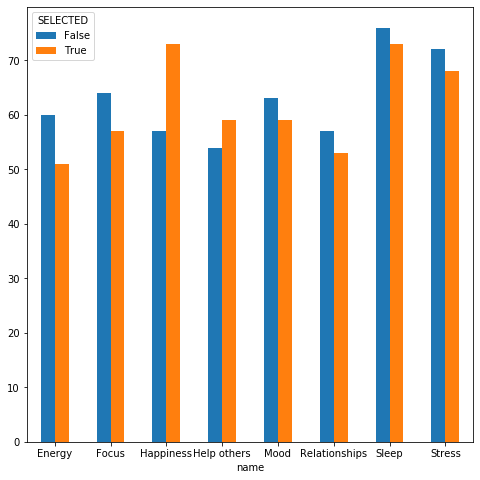

In [114]:
a5.plot(kind='bar', figsize=(8, 8))
ax.set(title='Intent combination of top 5% active users')
plt.xticks(rotation=0);

plt.savefig('Mentemia1/task7.png')

### Try this way and got same answer

### Grouping data into user_id, months, weeks and intens

In [84]:
r = data4.groupby(['user_id','m', 'w', 'name', 'SELECTED']).d.size()
r

user_id                    m        w         name       SELECTED
0003bc4b-50eb-4efb-8XXXXX  2020:m6  2020:w24  Energy     False       2
                                                         True        1
                                              Focus      True        3
                                              Mood       False       2
                                                         True        1
                                                                    ..
fffea4c8-1f96-4418-9XXXXX  2020:m7  2020:w28  Focus      True        2
                                              Happiness  False       1
                                                         True        2
                                              Stress     False       2
                                                         True        1
Name: d, Length: 113099, dtype: int64

In [85]:
r1 = r.reset_index()
r1

,user_id,m,w,name,SELECTED,d
0,0003bc4b-50eb-4efb-8XXXXX,2020:m6,2020:w24,Energy,False,2
1,0003bc4b-50eb-4efb-8XXXXX,2020:m6,2020:w24,Energy,True,1
2,0003bc4b-50eb-4efb-8XXXXX,2020:m6,2020:w24,Focus,True,3
3,0003bc4b-50eb-4efb-8XXXXX,2020:m6,2020:w24,Mood,False,2
4,0003bc4b-50eb-4efb-8XXXXX,2020:m6,2020:w24,Mood,True,1
...,...,...,...,...,...,...
113094,fffea4c8-1f96-4418-9XXXXX,2020:m7,2020:w28,Focus,True,2
113095,fffea4c8-1f96-4418-9XXXXX,2020:m7,2020:w28,Happiness,False,1
113096,fffea4c8-1f96-4418-9XXXXX,2020:m7,2020:w28,Happiness,True,2
113097,fffea4c8-1f96-4418-9XXXXX,2020:m7,2020:w28,Stress,False,2


In [95]:
r2 = r1[r1['d'] >= 3].sort_values('d', ascending=False)
r2

,user_id,m,w,name,SELECTED,d
9835,16486770-a315-407b-9XXXXX,2020:m7,2020:w27,Sleep,True,27
9834,16486770-a315-407b-9XXXXX,2020:m7,2020:w27,Sleep,False,21
91905,cfa9236f-e977-48e9-9XXXXX,2020:m7,2020:w27,Focus,True,19
107518,f33093cf-2b6d-424e-9XXXXX,2020:m6,2020:w23,Happiness,True,18
91902,cfa9236f-e977-48e9-9XXXXX,2020:m7,2020:w27,Energy,False,18
...,...,...,...,...,...,...
40128,5b0c8365-df4e-4ae6-aXXXXX,2020:m7,2020:w31,Energy,True,3
40137,5b1759d5-43b8-4b7f-9XXXXX,2020:m7,2020:w29,Mood,False,3
40142,5b2be0c6-0224-441a-9XXXXX,2020:m7,2020:w30,Energy,False,3
40157,5b49f8b2-0e76-41ca-9XXXXX,2020:m6,2020:w27,Sleep,False,3


In [96]:
# top 5% users 5/100 * 19600 = 980 rows
r3 = r2.head(980)
r3

,user_id,m,w,name,SELECTED,d
9835,16486770-a315-407b-9XXXXX,2020:m7,2020:w27,Sleep,True,27
9834,16486770-a315-407b-9XXXXX,2020:m7,2020:w27,Sleep,False,21
91905,cfa9236f-e977-48e9-9XXXXX,2020:m7,2020:w27,Focus,True,19
107518,f33093cf-2b6d-424e-9XXXXX,2020:m6,2020:w23,Happiness,True,18
91902,cfa9236f-e977-48e9-9XXXXX,2020:m7,2020:w27,Energy,False,18
...,...,...,...,...,...,...
49664,6facea26-6026-40ca-bXXXXX,2020:m7,2020:w29,Help others,False,5
49666,6facea26-6026-40ca-bXXXXX,2020:m7,2020:w29,Mood,False,5
11181,1938004f-be83-46c5-9XXXXX,2020:m7,2020:w28,Happiness,False,5
67894,98edd153-b339-4f00-9XXXXX,2020:m6,2020:w26,Help others,True,5


In [97]:
r4 = pd.crosstab(r3.name, r3.SELECTED)
r4

SELECTED,False,True
name,,
Energy,54,44
Focus,62,56
Happiness,59,73
Help others,58,56
Mood,61,62
Relationships,53,67
Sleep,76,61
Stress,74,64


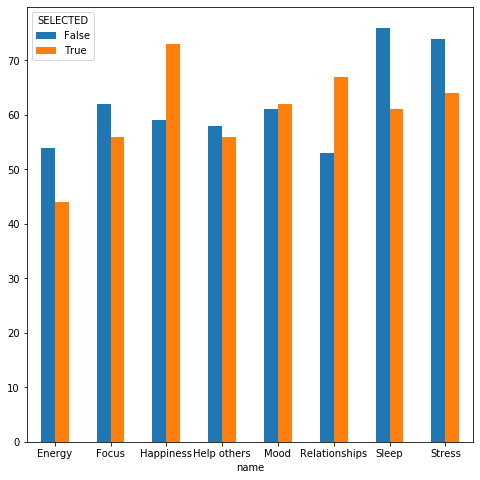

In [99]:
r4.plot(kind='bar', figsize=(8, 8))
ax.set(title='Intent combination by top 5% active users')
plt.xticks(rotation=0);

# Task 9

In [160]:
data1

,user_id,orgid,m,w,d,origin,contenttype,title
0,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:09,Today,Tool,Personality quiz
1,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Breathe to relax
2,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,Today,Content,Try this: Keep a thought journal for sleep
3,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,App-Introduction,Video,Watch Me First
4,0004f561-1320-47c1-bXXXXX,default,2020:m7,2020:w27,2020:07:01,Tools,Tool,Guided breathing
...,...,...,...,...,...,...,...,...
29995,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w28,2020:07:09,Today,Tool,Mood Tracker
29996,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:25,Today,Content,On the frontlines: Ruben Mackellar â€“ Lifelin...
29997,14804e89-6212-4d9d-bXXXXX,default,2020:m6,2020:w26,2020:06:26,Today,Content,Personal story: Getting real about how I feel
29998,14804e89-6212-4d9d-bXXXXX,default,2020:m7,2020:w27,2020:07:05,Today,Content,Personal story: I wonder if there are others l...


In [166]:
b1 = data1.contenttype.value_counts()
b1

Content    22461
Tool        6856
Video        683
Name: contenttype, dtype: int64

In [172]:
b2 = b1.reset_index()
b2

,index,contenttype
0,Content,22461
1,Tool,6856
2,Video,683


In [176]:
b2['prop'] =(b2['contenttype']/b2['contenttype'].sum() * 100).round(2)
b2

,index,contenttype,prop
0,Content,22461,74.87
1,Tool,6856,22.85
2,Video,683,2.28


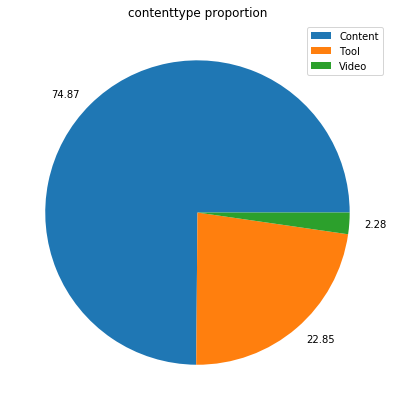

In [179]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(b2['prop'], labels=b2['prop'])
ax.set(title='contenttype proportion')
plt.legend(b2['index']);

#plt.savefig('Mentemia1/task.png')

In [165]:
b = data1.groupby(['user_id', 'contenttype']).size()
b

user_id                    contenttype
0003bc4b-50eb-4efb-8XXXXX  Content         2
                           Tool            1
                           Video           1
0004f561-1320-47c1-bXXXXX  Tool            4
                           Video           1
                                          ..
147e25e6-31fd-42f6-bXXXXX  Content         4
147f9a67-9f50-42a4-bXXXXX  Content         1
                           Tool            2
14804e89-6212-4d9d-bXXXXX  Content        29
                           Tool           18
Length: 3097, dtype: int64

In [157]:
# Inserting data
data2 = pd.read_csv('Mentemia1/Incomplete Suggestions.csv')
data2

,user_id,orgid,m,w,d,origin,contenttype,title,title.1
0,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,NaN,Content,3 stretches to help you sleep,3 stretches to help you sleep
1,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,NaN,Content,Sensationalism: How to avoid it,Sensationalism: How to avoid it
2,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,NaN,Tool,Guided breathing,Guided breathing
3,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,NaN,Tool,Worry Map,Worry Map
4,0003bc4b-50eb-4efb-8XXXXX,default,2020:m6,2020:w24,2020:06:10,NaN,Video,Watch Me First,Watch Me First
...,...,...,...,...,...,...,...,...,...
29995,16fd7b38-3e2b-4653-aXXXXX,default,2020:m7,2020:w27,2020:07:03,NaN,Content,Sir John Kirwan: How I look after my mental he...,Sir John Kirwan: How I look after my mental he...
29996,16fd7b38-3e2b-4653-aXXXXX,default,2020:m7,2020:w27,2020:07:03,NaN,Content,Try this: Free financial Goal Planner from Sor...,Try this: Free financial Goal Planner from Sor...
29997,16fd7b38-3e2b-4653-aXXXXX,default,2020:m7,2020:w27,2020:07:03,NaN,Content,Try this: Stretch every day to feel lighter an...,Try this: Stretch every day to feel lighter an...
29998,16fd7b38-3e2b-4653-aXXXXX,default,2020:m7,2020:w27,2020:07:03,NaN,Video,Watch Me First,Watch Me First


In [159]:
data2.title.value_counts()

Mood Tracker                                                                   2391
Watch Me First                                                                 1195
Personality quiz                                                               1186
Worry Map                                                                       912
Guided breathing                                                                908
                                                                               ... 
Normal emotions in an abnormal time                                               1
Send a photo to a friend that captures a good memory of you both.                 1
Tips for handling difficult conversations at work                                 1
COVID-19: How to teach your children about hand washing (via Nanogirl)            1
Dr Nic Gill: 5 reasons to exercise that have nothing to do with getting fit       1
Name: title, Length: 268, dtype: int64

In [170]:
c = data2.contenttype.value_counts()
c

Content    22457
Tool        6348
Video       1195
Name: contenttype, dtype: int64

In [180]:
c1 = c.reset_index()
c1

,index,contenttype
0,Content,22457
1,Tool,6348
2,Video,1195


In [181]:
c1['prop'] = (c1['contenttype']/c1['contenttype'].sum() * 100).round(2)
c1

,index,contenttype,prop
0,Content,22457,74.86
1,Tool,6348,21.16
2,Video,1195,3.98


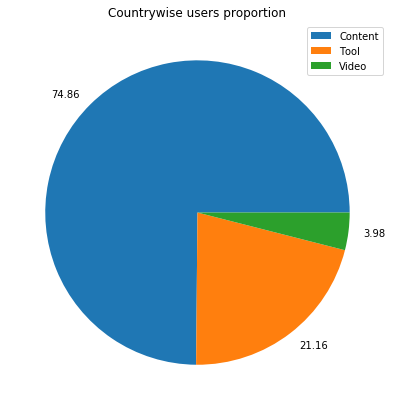

In [182]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.pie(c1['prop'], labels=c1['prop'])
ax.set(title='Countrywise users proportion')
plt.legend(c1['index']);

#plt.savefig('Mentemia1/task8.png')

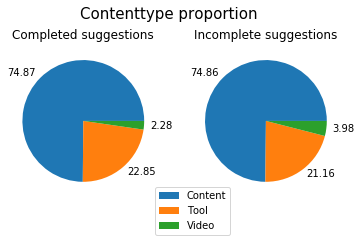

In [242]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6, 8))
plt.suptitle('Contenttype proportion', x=0.5,y=0.7, fontsize=15)
ax1.pie(b2['prop'], labels=b2['prop'])
ax2.pie(c1['prop'], labels=c1['prop'])

ax1.set(title='Completed suggestions')
ax2.set(title='Incomplete suggestions')
ax2.legend(c1['index'], bbox_to_anchor=(0.3, 0.1));

plt.savefig('Mentemia1/task9.png')

IndexError: too many indices for array

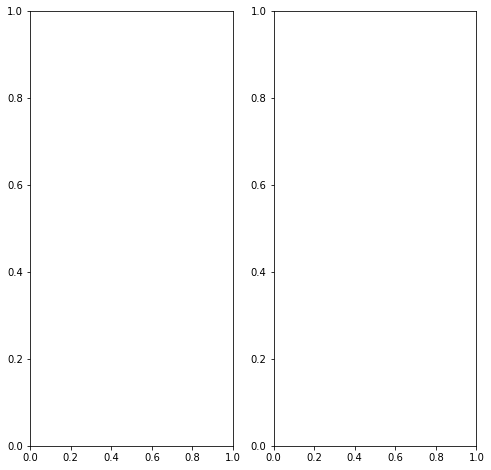

In [214]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
#ax.title('Contenttype proportion')
ax[1, 1].pie(b2['prop'], labels=b2['prop'])
ax[1, 2].pie(c1['prop'], labels=c1['prop'])

# ax1.set(title='Completed suggestions')
# ax2.set(title='Incomplete suggestions')
# ax2.legend(c1['index']);

#plt.savefig('Mentemia1/task8.png')